In [1]:
import numpy as np
from numba import cuda
import matplotlib.pyplot as plt

In [2]:
len(cuda.gpus)

1

In [3]:
cuda.gpus[0].name

b'GeForce GT 720'

[Supported Python features in CUDA Python](https://numba.pydata.org/numba-doc/dev/cuda/cudapysupported.html)

In [4]:
import math

@cuda.jit
def calc_z(z):
    i, j = cuda.grid(2)
    m, n = z.shape
    if i>=m or j>=n:
        return
    # 这里尽量用float()转换类型, 折腾了好久
    # z[i, j]=math.sin(float(9e-6*i*j))  
    z[i, j]=math.sin(9e-6*i*j)

In [5]:
N=1000
z=np.zeros((N, N))

# 参见IPython cookbook的解释: 分成20x20 blocks, 每一个block是5x5
bs=10
bpg=N//bs

f=calc_z[(bpg, bpg), (bs, bs)]

In [6]:
f(z)

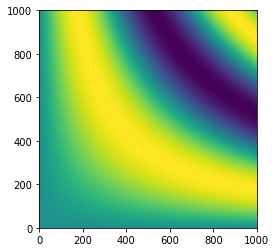

In [7]:
plt.imshow(z, origin='lower')

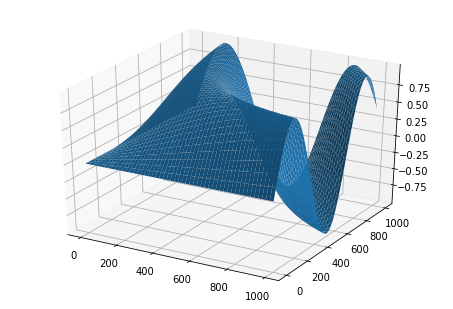

In [8]:
from mpl_toolkits.mplot3d import Axes3D
x, y=np.ogrid[0:N, 0:N]
fig=plt.figure()
ax=Axes3D(fig)
ax.plot_surface(x, y, z)

In [9]:
# GPU太次，提速不明显
%timeit -r 2 f(z)

14.4 ms ± 56.7 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [10]:
%timeit -r 2 np.sin(9e-6*x*y)

6.43 ms ± 217 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [11]:
zz=np.sin(9e-6*x*y)

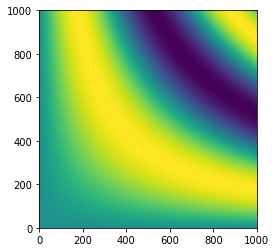

In [12]:
plt.imshow(zz, origin='lower')

In [13]:
import numexpr as ne
# numexpr在数据量大的时候提速明显

%timeit -r 2 ne.evaluate('sin(9e-6*x*y)')

2.65 ms ± 23.1 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [14]:
zzz=ne.evaluate('sin(9e-6*x*y)')

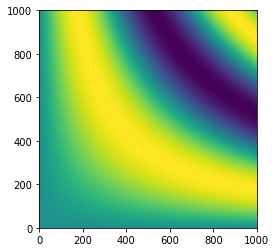

In [15]:
plt.imshow(zzz, origin='lower')